In [1]:
%pylab inline


import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

from osgeo import gdal
from osgeo import gdal_array

# from matplotlib.transforms import offset_copy

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


Populating the interactive namespace from numpy and matplotlib


In [2]:

base_projection = ccrs.PlateCarree()
global_extent = [ -180, 180, -90, 90 ]
 

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")

rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                                        edgecolor='Blue', facecolor="none")


coastline50 = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(1.0,1.0,1.0),
                           facecolor="none")

rivers50 = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',
                                        edgecolor='Blue', facecolor="none")


lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor="blue", facecolor="blue")

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                           edgecolor="green",
                           facecolor="blue")

In [3]:


## The full list of available interfaces is found in the source code for this one:
## https://github.com/SciTools/cartopy/blob/master/lib/cartopy/io/img_tiles.py

## Continental US terrain images
stamen_USA_Terrain = cimgt.StamenTerrain()

## Mapquest satellite images 
map_quest_aerial = cimgt.MapQuestOpenAerial()

## Mapquest street map
map_quest_street = cimgt.MapQuestOSM()

## Open Street map
open_street_map = cimgt.OSM()

## Mapbox Satellite images 

mapbox_satellite = cimgt.MapboxTiles(map_id='mapbox.satellite', 
                                     access_token='pk.eyJ1IjoibG91aXNtb3Jlc2kiLCJhIjoiY2lqM2liajRnMDA1d3Zia254c3d0aWNzOCJ9.FO_VUuxm9tHhzlffiKwcig')


## Google maps image tiles ()
google_maps = cimgt.GoogleTiles() 




/usr/local/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


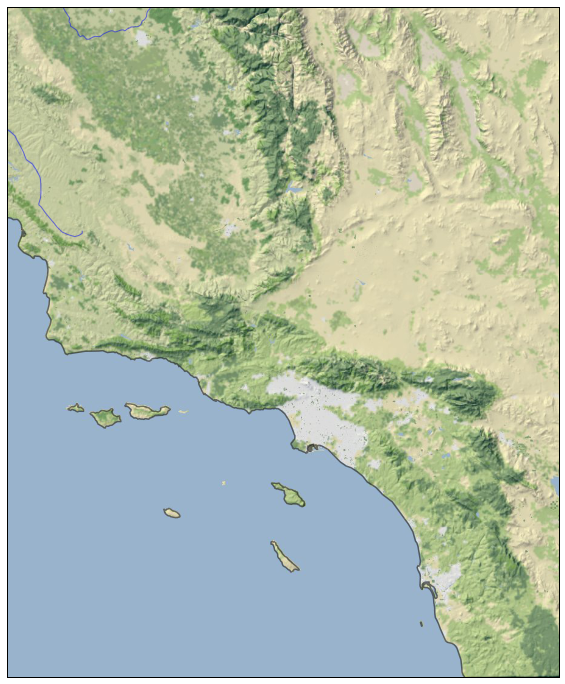

In [4]:
# Specify a region of interest

lat0 =  32  ; lat1 = 37
lon0 =  -121; lon1 = -116

map_extent = [lon0, lon1, lat0, lat1]

map_tiles = stamen_USA_Terrain

fig = plt.figure(figsize=(12, 12), facecolor="none")
# ax = plt.axes(projection=ccrs.PlateCarree(), extent=himalaya_extent)

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 8, alpha=1.0, zorder=0)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
ax.add_feature(rivers,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)


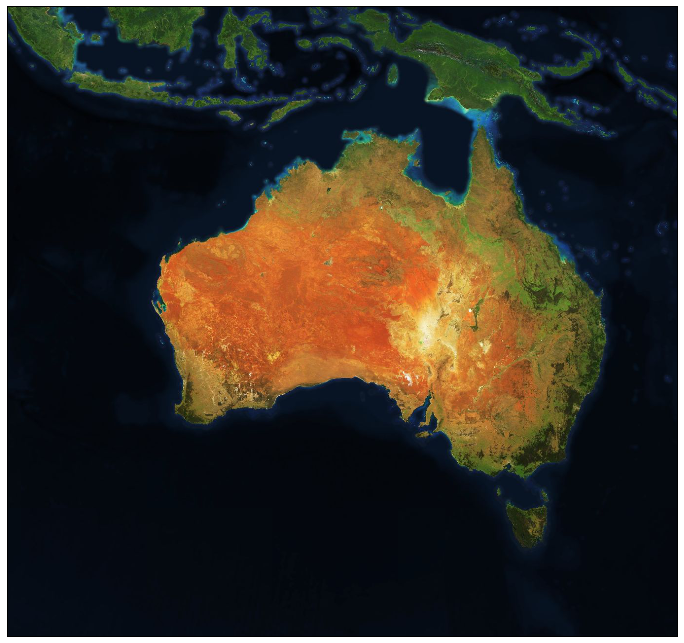

In [5]:
# Specify a region of interest

lat0 =  -45  ; lat1 = 0
lon0 =  100  ; lon1 = 160

map_extent = [lon0, lon1, lat0, lat1]

map_tiles = mapbox_satellite

fig = plt.figure(figsize=(12, 12), facecolor="none")

ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)

# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 5, alpha=1.0, zorder=2)

ax.add_feature(coastline50, linewidth=1.5,  edgecolor="Black", zorder=1)
ax.add_feature(rivers50,    linewidth=1.0,  edgecolor="Blue",  zorder=2)


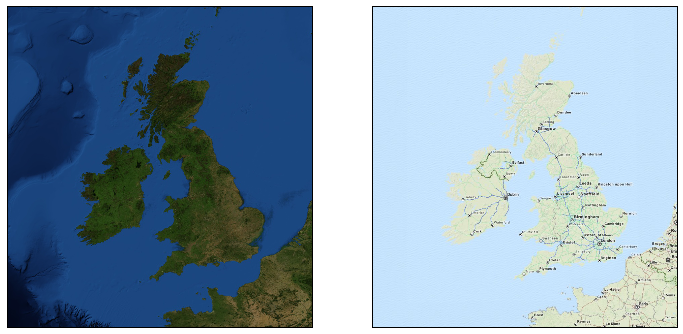

In [6]:
lat0 =   48  ; lat1 = 60
lon0 =  -15  ; lon1 = 5

map_extent = [lon0, lon1, lat0, lat1]


fig  = plt.figure(figsize=(12, 12), facecolor="none")
ax1  = plt.subplot(121, projection=map_quest_aerial.crs)
ax2  = plt.subplot(122, projection=map_quest_street.crs)

ax1.set_extent(map_extent)
ax2.set_extent(map_extent)

ax1.add_image(map_quest_aerial, 6, alpha=1.0, zorder=2)
ax2.add_image(map_quest_street, 6, alpha=1.0, zorder=2)


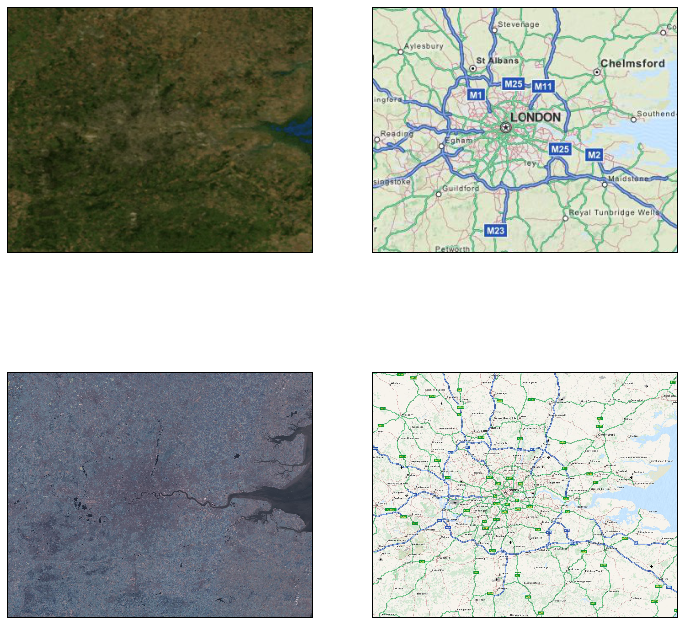

In [7]:

# To test what the influence of the resolution parameter is on the map that is returned ... 

lat0 =   51  ; lat1 = 52
lon0 =  -1  ; lon1 = 1

map_extent = [lon0, lon1, lat0, lat1]


fig  = plt.figure(figsize=(12, 12), facecolor="none")
ax1  = plt.subplot(221, projection=map_quest_aerial.crs)
ax2  = plt.subplot(222, projection=map_quest_street.crs)
ax3  = plt.subplot(223, projection=map_quest_aerial.crs)
ax4  = plt.subplot(224, projection=map_quest_street.crs)

ax1.set_extent(map_extent)
ax2.set_extent(map_extent)
ax3.set_extent(map_extent)
ax4.set_extent(map_extent)

ax1.add_image(map_quest_aerial, 8, alpha=1.0, zorder=2)
ax2.add_image(map_quest_street, 8, alpha=1.0, zorder=2)

ax3.add_image(map_quest_aerial, 10, alpha=1.0, zorder=2)
ax4.add_image(map_quest_street, 10, alpha=1.0, zorder=2)

In [8]:
fig.savefig("ResolutionTest.png", dpi=600)

See how well that worked by opening the [full-size image](ResolutionTest.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.

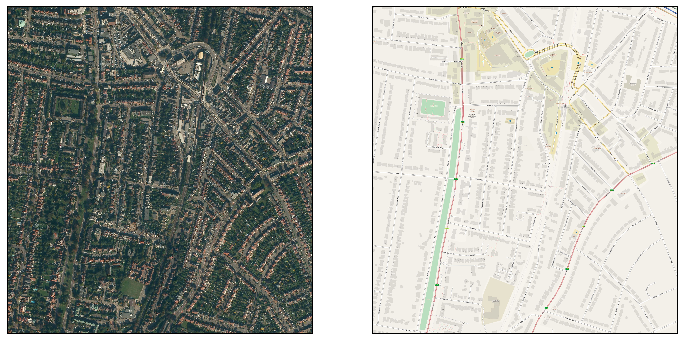

In [9]:
## For fun, this is the street where I grew up ... 

lat0 =   51.585 ; lat1 = 51.595
lon0 =   0.018   ; lon1 = 0.033

map_extent = [lon0, lon1, lat0, lat1]


fig  = plt.figure(figsize=(12, 6), facecolor="none")
ax1  = plt.subplot(121, projection=map_quest_aerial.crs)
ax2  = plt.subplot(122, projection=map_quest_street.crs)

ax1.set_extent(map_extent)
ax2.set_extent(map_extent)

ax1.add_image(mapbox_satellite, 18, alpha=1.0, zorder=2)
ax2.add_image(map_quest_street, 18, alpha=1.0, zorder=2)


In [10]:
## the detail is not visible until you dump a high resolution version of the image

fig.savefig("LondonE18.png", dpi=600)